In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kunalvats8701","key":"bfec9f9b13b7af68447f62219902200c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product
!unzip -q real-life-industrial-dataset-of-casting-product.zip
!rm real-life-industrial-dataset-of-casting-product.zip

Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
  0% 0.00/100M [00:00<?, ?B/s]
100% 100M/100M [00:00<00:00, 2.04GB/s]


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint

Visualizing Training Data:


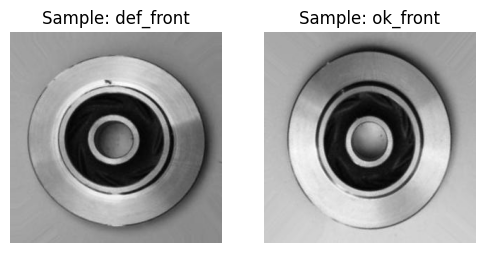

In [ ]:
train_directory = '/content/casting_data/casting_data/train'
test_directory = '/content/casting_data/casting_data/test'

def plot_sample_images(directory):
    categories = os.listdir(directory)
    plt.figure(figsize=(6, 3))

    for i, category in enumerate(categories):
        img_path = os.path.join(directory, category, os.listdir(os.path.join(directory, category))[0])
        img = load_img(img_path)
        plt.subplot(1, len(categories), i + 1)
        plt.imshow(img)
        plt.title(f'Sample: {category}')
        plt.axis('off')
    plt.show()

print("Visualizing Training Data:")
plot_sample_images(train_directory)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
checkpoint = ModelCheckpoint(
    'Vgg16_97.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    callbacks=[checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7871 - loss: 0.8206 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)



Epoch 1: val_accuracy improved from -inf to 0.95245, saving model to Vgg16_97.h5


208/208 ━━━━━━━━━━━━━━━━━━━━ 2807s 13s/step - accuracy: 0.7876 - loss: 0.8182 - val_accuracy: 0.9524 - val_loss: 0.1383
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9847 - loss: 0.0726 
Epoch 2: val_accuracy improved from 0.95245 to 0.99161, saving model to Vgg16_97.h5


208/208 ━━━━━━━━━━━━━━━━━━━━ 2866s 14s/step - accuracy: 0.9847 - loss: 0.0726 - val_accuracy: 0.9916 - val_loss: 0.0377
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9899 - loss: 0.0415 
Epoch 3: val_accuracy did not improve from 0.99161
208/208 ━━━━━━━━━━━━━━━━━━━━ 2832s 14s/step - accuracy: 0.9899 - loss: 0.0415 - val_accuracy: 0.9874 - val_loss: 0.0444
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9837 - loss: 0.0521 
Epoch 4: val_accuracy did not improve from 0.99161
208/208 ━━━━━━━━━━━━━━━━━━━━ 2972s 14s/step - accuracy: 0.9837 - loss: 0.0520 - val_accuracy: 0.9818 - val_loss: 0.0675
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9931 - loss: 0.0321 
Epoch 5: val_accuracy did not improve from 0.99161
208/208 ━━━━━━━━━━━━━━━━━━━━ 2825s 14s/step - accuracy: 0.9931 - loss: 0.0321 - val_accuracy: 0.9678 - val_loss: 0.1117
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9882 - loss: 0.0397 
Epoch 6: val_accura

208/208 ━━━━━━━━━━━━━━━━━━━━ 2838s 14s/step - accuracy: 0.9905 - loss: 0.0274 - val_accuracy: 0.9930 - val_loss: 0.0319
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9937 - loss: 0.0189 
Epoch 9: val_accuracy improved from 0.99301 to 0.99580, saving model to Vgg16_97.h5


208/208 ━━━━━━━━━━━━━━━━━━━━ 2862s 14s/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 0.9958 - val_loss: 0.0162
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9891 - loss: 0.0365 
Epoch 10: val_accuracy did not improve from 0.99580
208/208 ━━━━━━━━━━━━━━━━━━━━ 2849s 14s/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9944 - val_loss: 0.0209


In [ ]:
def test_single_image(image_path):
    test_image = load_img(image_path, target_size=(224, 224))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0

    result = model.predict(test_image)

    if result[0][0] < 0.5:
        print(f"Prediction for {os.path.basename(image_path)}: Defective Product")
    else:
        print(f"Prediction for {os.path.basename(image_path)}: Good Product")

def_image_path = os.path.join(test_directory, 'def_front', os.listdir(os.path.join(test_directory, 'def_front'))[0])
ok_image_path = os.path.join(test_directory, 'ok_front', os.listdir(os.path.join(test_directory, 'ok_front'))[0])

test_single_image(def_image_path)
test_single_image(ok_image_path)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
Prediction for cast_def_0_2515.jpeg: Defective Product
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Prediction for cast_ok_0_7946.jpeg: Good Product


In [ ]:
from google.colab import files
files.download('Vgg16_97.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>